In [9]:
import pandas as pd
from ydata_profiling import ProfileReport

In [10]:
house_dataset = pd.read_csv('../housing_dataset.csv')
house_dataset_df = pd.DataFrame(house_dataset)


#house_dataset.info()
profile = ProfileReport(house_dataset_df, title="Pandas Profiling Report", explorative=True)
profile
profile.to_file("housing_analysis.html")

In [11]:
from matplotlib import pyplot as plt

In [108]:
from sklearn.linear_model import LinearRegression, Ridge
import numpy as np

In [13]:
from sklearn.model_selection import train_test_split

# VARIABLES CATEGORIELLES

In [14]:
cat=(house_dataset_df.select_dtypes('object'))
house_categ = cat.dropna(axis='columns')
#house_categ.count() #number of values in our dataset after droping nan values

In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import VarianceThreshold

le = LabelEncoder()

In [16]:
house_categ[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition']] = house_categ[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition']].apply(le.fit_transform)

house_categ.var(axis=0)
selector = VarianceThreshold(threshold=2)
selector.fit_transform(house_categ[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition']])
selector.get_support()

C:\Users\Rasso\AppData\Local\Temp\ipykernel_2664\2067213728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_categ[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',


array([False, False, False, False, False,  True, False,  True, False,
       False, False,  True, False, False,  True,  True, False, False,
       False, False,  True, False, False, False, False,  True, False])

# get the feature names
feature_names = house_categ.columns
feature_names

In [17]:
from sklearn.feature_selection import chi2, SelectKBest 

In [18]:
mean_sp = house_dataset_df['SalePrice'].mean()
#house_dataset_df.loc[1460,'SalePrice'] = mean_sp
y = house_categ[['LotConfig',  'Neighborhood', 'HouseStyle', 'Exterior1st','Exterior2nd','HeatingQC','SaleType']]

# get the target variable
X = house_categ[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition']]

# compute chi-squared stats
chi2_stats, p_values = chi2(X,house_categ['Exterior2nd'])
chi2_stats, p_values

(array([6.78732886e+00, 2.63199587e-02, 6.75815178e+01, 1.01843296e+01,
        6.05314010e+00, 1.82947218e+01, 5.31701186e+01, 8.25411687e+01,
        1.37210129e+01, 2.85796069e-01, 3.12719795e+02, 1.42471245e+02,
        2.14360930e+01, 1.93145010e+01, 1.17668376e+03, 1.76885692e+03,
        5.37043672e+01, 5.17558848e+00, 1.25938502e+02, 9.20543280e+00,
        6.96097144e+02, 1.13411213e+01, 6.15127063e+01, 6.12203031e+00,
        1.47252362e+01, 2.65876552e+00, 1.91136164e+01]),
 array([9.63284632e-001, 1.00000000e+000, 1.20010681e-008, 8.07987612e-001,
        9.78841230e-001, 2.47488302e-001, 3.61275511e-006, 2.38884038e-011,
        5.46784734e-001, 1.00000000e+000, 1.26403023e-057, 7.48279458e-023,
        1.23465041e-001, 1.99834346e-001, 1.66588176e-241, 0.00000000e+000,
        2.94310272e-006, 9.90532453e-001, 1.32272414e-019, 8.66533239e-001,
        1.26216294e-138, 7.28059355e-001, 1.38322148e-007, 9.77624195e-001,
        4.71384078e-001, 9.99811531e-001, 2.08631446e-

In [19]:
best_feat = SelectKBest(chi2, k=4)
best_feat.fit_transform(X,house_categ['Exterior2nd'])
best_feat.get_support()
# Hypothese 0: indépendance des variables = False
# Hypothese rejetee = True

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True,  True, False, False,
       False, False,  True, False, False, False, False, False, False])

# VARIABLES NUMERIQUES

In [31]:
trainX = house_dataset_df[['OverallQual',
    'GrLivArea',
    'GarageCars',
    'GarageArea',
    'TotalBsmtSF',
    '1stFlrSF',
    'FullBath',
    'TotRmsAbvGrd',
    'YearBuilt',
    'YearRemodAdd',
    'MasVnrArea',
    'Fireplaces',
    'BsmtFinSF1',
    'LotFrontage',
    'WoodDeckSF',
    'OpenPorchSF',
    '2ndFlrSF',
    'HalfBath','LotArea']].fillna(0).values

In [32]:

xtrain, xtest, ytrain, ytest = train_test_split(trainX, house_dataset_df['SalePrice'], train_size=0.8)

In [33]:
regr = LinearRegression()
regr.fit(xtrain, ytrain)
predictions = regr.predict(xtest)
regr.coef_

array([ 1.97002176e+04,  3.85400160e+01,  1.32758305e+04, -1.19623618e+00,
        6.43466281e+00,  9.66317931e+00, -1.84761965e+03,  4.42166089e+02,
        1.83862000e+02,  3.31273600e+02,  2.16011096e+01,  6.10363676e+03,
        1.44671652e+01,  2.22838564e+01,  3.48173097e+01,  6.65822025e+00,
        4.30379401e+00, -1.91946272e+03,  5.01175506e-01])

In [34]:
erreur = 1 - regr.score(xtest,ytest)
erreur

0.19482286612362432

In [24]:
house_dataset_df.corr()["SalePrice"].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

In [25]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

In [35]:
dtr.fit(xtrain, ytrain)
predictions = dtr.predict(xtest)
predictions

array([167000., 112000.,  81000., 155000., 203000., 180000., 245500.,
       176000., 213250., 149000., 143000., 139400., 254900., 286000.,
       156000., 213500., 200500., 225000., 125000., 216500.,  92900.,
       197500., 140000., 225000., 107400., 180000., 191000., 133900.,
       147400., 229456., 164990., 260000., 149000., 315750., 120500.,
       110000., 172400., 176000., 194000., 290000., 140000., 392500.,
       110000., 315000., 307000., 119500., 392500., 177500., 137900.,
       185000., 133000., 150000., 155000., 192000., 176000., 213500.,
       311872., 159000., 202500., 189000., 179900., 139400., 108500.,
       123600.,  87000., 144500., 244600., 190000., 333168., 171000.,
       120000., 167000., 101000., 314813., 159500., 138500., 196500.,
       169990., 139600., 144000., 109000., 215000., 176000., 185000.,
       138000., 201800., 173000., 102000., 159500.,  55993., 177000.,
       394617.,  75000., 175000., 117500., 118400., 175000., 465000.,
       257500., 1539

In [36]:
erreur = 1 - dtr.score(xtest,ytest)
erreur

0.20276111058378343

# COMBINAISON DES VARIABLES CATEGORIELLES ET NUMERIQUES

In [62]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['OverallQual',
    'GrLivArea',
    'GarageCars',
    'GarageArea',
    'TotalBsmtSF',
    '1stFlrSF',
    'FullBath',
    'TotRmsAbvGrd',
    'YearBuilt',
    'YearRemodAdd',
    'MasVnrArea',
    'Fireplaces',
    'BsmtFinSF1',
    'LotFrontage',
    'WoodDeckSF',
    'OpenPorchSF',
    '2ndFlrSF',
    'HalfBath','LotArea','SalePrice']),
        ('cat', OneHotEncoder(), ['MSSubClass','MSZoning','Neighborhood','Condition1'])
    ])

In [63]:
# Transform the data
X_processed = preprocessor.fit_transform(house_dataset_df)

# Compute the mean value while ignoring NaN values
mean_val = np.nanmean(X_processed)

# Replace NaN values with the mean value
X_processed[np.isnan(X_processed)] = mean_val



In [64]:
xtrain, xtest, ytrain, ytest = train_test_split(X_processed, house_dataset_df['SalePrice'], train_size=0.8)

In [137]:
from sklearn.ensemble import RandomForestRegressor
lr = LinearRegression()
ridge = Ridge(alpha=0.0001)
tree = DecisionTreeRegressor()
# Create a random forest regressor
forest = RandomForestRegressor(max_depth=2, random_state=0)


ridge.fit(xtrain, ytrain)
predictions = ridge.predict(xtest)
erreur = 1 - ridge.score(xtest,ytest)
erreur

2.7755575615628914e-14

# EVALUATION DE MODELES

In [138]:
accuracy_lr = []

for i in range (0, ytest.shape[0]):
    if ytest.tolist()[i] - predictions[i] < 0:
        accuracy_lr.append(predictions[i] -ytest.tolist()[i])
    else:
        accuracy_lr.append(ytest.tolist()[i] - predictions[i])


accuracy_lr = np.asarray(accuracy_lr)
accuracy_lr.mean()

0.00910601363673229

# CROSS VALIDATION

In [139]:
from sklearn.model_selection import cross_val_score, KFold, validation_curve, GridSearchCV, learning_curve

cv = KFold(4, random_state=0, shuffle=True)
cross_val_score(ridge, xtrain, ytrain, cv=cv).mean()

0.9999999999998812

# VALIDATION CURVE

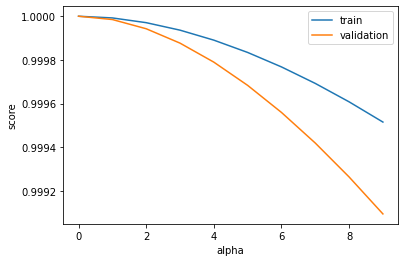

In [140]:
k = np.arange(0,10)
train_score, val_score = validation_curve(ridge, xtrain, ytrain,param_name='alpha', param_range=k, cv=4)
plt.plot(k,train_score.mean(axis=1), label='train')
plt.plot(k,val_score.mean(axis=1), label='validation')
plt.xlabel("alpha")
plt.ylabel("score")
plt.legend()

In [136]:
# Define hyperparameter grid
param_grid = {'alpha': [0.1, 0.01, 0.0009, 0.2, 0.0001]}

# Create a grid search object
grid_search = GridSearchCV(ridge, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(xtrain, ytrain)

# Print the best hyperparameters
print(grid_search.best_params_)
model = grid_search.best_estimator_

{'alpha': 0.0001}


In [141]:
model.score(xtest,ytest)

0.9999999999999722

# CHECK IF WE HAVE OVERFITTING

In [142]:
N, train_score, val_score = learning_curve(model, xtrain, ytrain, train_sizes=np.linspace(0.2,1,10), cv=5)
print(N)

[186 269 352 435 518 601 684 767 850 934]


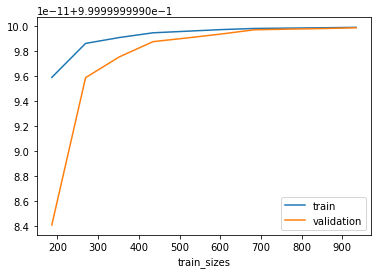

In [143]:
plt.plot(N,train_score.mean(axis=1), label='train')
plt.plot(N,val_score.mean(axis=1), label='validation')
plt.xlabel("train_sizes")
plt.legend()
#On voit dans la courbe qu'à partir de 684 données d'entraînement, notre modèle stagne. 
# Le fait de collecter plus de données n'est donc pas utile